# Problem Set 4
In this problem set you will get some practice with the proximal gradient algorithm, and also acceleration. Specifically, you will be implementing ISTA and FISTA

# Problem 1: Gradient Descent and Acceleration
In this problem you will explore the impact of ill-conditioning on gradient descent, and will then see how acceleration can improve the situation. This exercise will walk you through a very similar situation as to what we saw in the lecture videos that illustrate the performance of gradient descent vs accelerated gradient descent as the condition number (ratio of largest to smallest eigenvalues of the Hessian) increases. This is a ``toy'' problem, but it is still instructive regarding the performance of these two algorithms.

You will work with the following simple function:
$$
f(x) = \frac{1}{2}x^{\top}Qx,
$$
where $Q$ is a 2 by 2 matrix, as defined below.

In [8]:
# We create the data for this simple problem. We will create three quadratics.
# Q_wc -- this is a well-conditioned matrix
# Q_ic -- this is an ill-conditioned matrix
# Q_sic -- this is... a somewhat-ill-conditioned matrix (a technical term!)
import numpy as np
Q_wc = np.array([[1,0.3],[0.3,1]]); q = np.array([0,0]);
Q_sic = np.array([[1,0.85],[0.85,1]]); q = np.array([0,0]);
Q_ic = np.array([[1,0.99],[0.99,1]]); q = np.array([0,0]);


## Part (A):
Consider the quadratic functions $f_{wc}$, $f_{sic}$, and $f_{ic}$ defined by the quadratic matrices above. For each of these, say whether they are $\beta$-smooth and/or $\alpha$-strongly convex, and if so, compute the value of the condition number, $\kappa = \beta/\alpha$ for each function.

In [ ]:
#A matrix is strongly convex if and only if its associated matrix is positive definite.
#a matrix is positive definite if all of its eigenvalues are positive. Similarly , it's B-smooth if the largest eigenvalueis finite


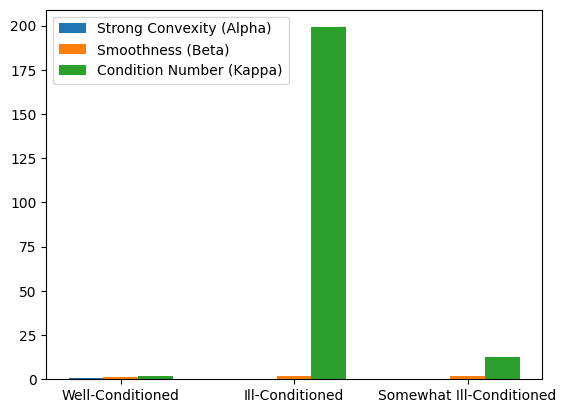

In [9]:
import matplotlib.pyplot as plt

#so will write a function to calculate these value
def eigenvalues_matrix(Q):
    eigenvalues = np.linalg.eigvals(Q)

    #for strongly convex, all eigenvalues must be positive.. so will take the lowest one , if greater than zero, it will be strongly convex
    alpha = min(eigenvalues)

    #for beta smooth, will take the largest value
    beta = max(eigenvalues)

    #kapa - beta/alpha
    k = beta / alpha if alpha != 0 else np.inf

    return alpha, beta, k

alpha_Q_wc, beta_Q_wc, k_Q_wc = eigenvalues_matrix(Q_wc)
alpha_Q_ic, beta_Q_ic, k_Q_ic = eigenvalues_matrix(Q_ic)
alpha_Q_sic, beta_Q_sic, k_Q_sic = eigenvalues_matrix(Q_sic)

(alpha_Q_wc, beta_Q_wc, k_Q_wc),(alpha_Q_ic, beta_Q_ic, k_Q_ic),(alpha_Q_sic, beta_Q_sic, k_Q_sic)

#for Q_wc: min is greater than zero - strong convex. Beta is finite. Also Beta-smooth
#for Q_sic: min is greater than zero - strong convex. Beta is finite. Also Beta-smooth
#for Q_ic: min is greater than zero - strong convex. Beta is finite. Also Beta-smooth


#plot
alphas = [alpha_Q_wc, alpha_Q_ic, alpha_Q_sic]
betas = [beta_Q_wc, beta_Q_ic, beta_Q_sic]
kappas = [k_Q_wc, k_Q_ic, k_Q_sic]

labels = ['Well-Conditioned','Ill-Conditioned','Somewhat Ill-Conditioned']

#figure and set of subplots
figure, ax = plt.subplots()

#position the labels
index = range(len(labels))

ax.bar(index, alphas, width=0.2, label='Strong Convexity (Alpha)')
ax.bar([i + 0.2 for i in index], betas, width=0.2, label='Smoothness (Beta)')
ax.bar([i + 0.4 for i in index], kappas, width=0.2, label='Condition Number (Kappa)')

ax.set_xticks([i + 0.2 for i in index])
ax.set_xticklabels(labels)

ax.legend()
plt.show()

## Part (B):
Compute the best fixed step size for gradient descent, and the best parameters for accelerated gradient descent. For each function, plot the error $(f(x_t) - f(x^{\ast})$ as a function of the number of iterations. For each function, plot these on the same plot so you can compare -- so you should have 3 plots total.

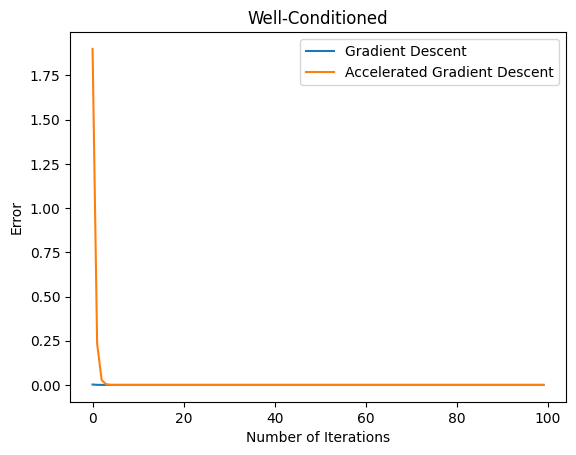

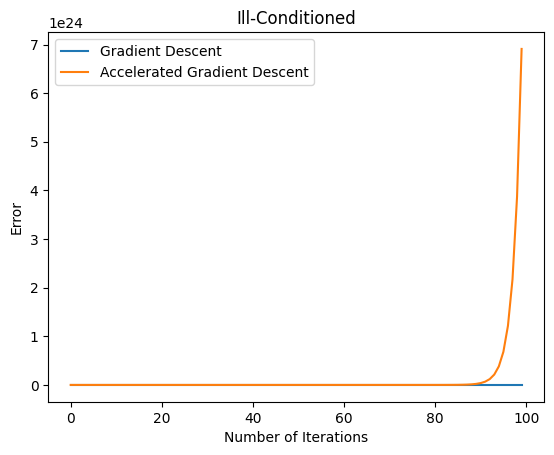

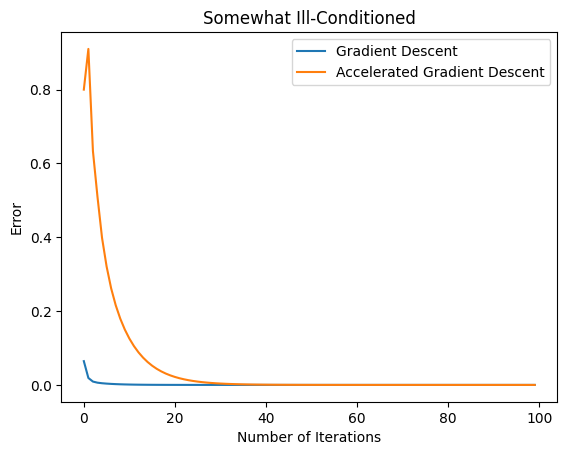

In [10]:
# will choose the step size of eta = 1/beta as it's typically the best value for gradient descent

#starting with the quadratic

def quad_value(Q, x):
  return 0.5*np.dot(x,np.dot(Q,x));

def gradient(Q, x):
  #gradient is just Q(x)
  return Q.dot(x)

#gradient descend
def gradient_descent(Q, alpha, number_of_iterations=100):

  x = np.random.rand(Q.shape[0])
  #for a quadratic solution, optimal is Qx = 0
  x_star = np.linalg.solve(Q, np.zeros(Q.shape[0]))
  #similarly, optimal value for f(x_star) is zero
  f_star = quad_value(Q, x_star)

  errors = []
  for i in range(number_of_iterations):
    #compute gradient at curr x
    grad = gradient(Q, x)
    #update the step
    x = x - alpha * grad
    #current value of the function
    f_x = quad_value(Q,x)
    errors.append(f_x - f_star)
  return errors


#accelerated gradient descent
def accelerated_gradient_descent(Q, eta, condition, number_of_iterations):
    gamma = (np.sqrt(condition) - 1) / (np.sqrt(condition) + 1)
    x0 = np.array([-2,1])
    x = x0
    y = x0
    errors = np.zeros(number_of_iterations)
    x_t = np.zeros((number_of_iterations, len(x0)))

    for t in range(number_of_iterations):
        errors[t] = quad_value(Q, x)
        grad = gradient(Q, x)
        y_t1 = x - eta * grad
        x = (1 + gamma) * y_t1 - gamma * y
        y = y_t1
        x_t[t] = x

    return errors

######
number_of_iterations=100

#step sizes based on the values obtained before
step_sizes = [1/beta_Q_wc, 1/beta_Q_ic, 1/beta_Q_sic]


#calculate the errors
errors_wc = gradient_descent(Q_wc, step_sizes[0], number_of_iterations)
errors_ic = gradient_descent(Q_ic, step_sizes[0], number_of_iterations)
errors_sic = gradient_descent(Q_sic, step_sizes[0], number_of_iterations)

errors_agc_wc = accelerated_gradient_descent(Q_wc, step_sizes[0], beta_Q_wc / alpha_Q_wc, number_of_iterations)
errors_agc_ic = accelerated_gradient_descent(Q_ic, step_sizes[0], beta_Q_ic / alpha_Q_ic, number_of_iterations)
errors_agc_sic = accelerated_gradient_descent(Q_sic, step_sizes[0], beta_Q_sic / alpha_Q_sic, number_of_iterations)


#plot time
#figure and set of subplots
figure, ax = plt.subplots()

ax.plot(errors_wc, label='Gradient Descent')
ax.plot(errors_agc_wc, label='Accelerated Gradient Descent')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Error')
ax.set_title(labels[0])
ax.legend()
plt.show()

figure, ax = plt.subplots()
ax.plot(errors_ic, label='Gradient Descent')
ax.plot(errors_agc_ic, label='Accelerated Gradient Descent')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Error')
ax.set_title(labels[1])
ax.legend()
plt.show()

figure, ax = plt.subplots()
ax.plot(errors_sic, label='Gradient Descent')
ax.plot(errors_agc_sic, label='Accelerated Gradient Descent')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Error')
ax.set_title(labels[2])
ax.legend()
plt.show()





# Problem 2: ISTA and FISTA
Recall the least squares problem with $\ell^1$ regularization from the previous homework:
$$
\min_x \left[f(x) = \frac{1}{2}\|{Ax-b}\|_2^2 + \lambda \|{x}\|_1 \right]
$$

Recall key characteristics of this problem: it is nonsmooth due to the regularization term, and it is not strongly convex when $A$ has more columns than rows. This is why you used the sub-gradient method on the previous problem set, rather than Gradient descent.

Recall the goal of the proximal gradient algorithm: when we have a composite function, i.e., a function of the form $f(x) = g(x) + h(x)$, if $g(x)$ is $\beta$-smooth and $h(x)$ is ``simple'' in the sense that it has a simple prox function, then rather than using the subgradient method, we can get much better results by using proximal gradient, which takes advantage of the fact that $g(x)$ is smooth. We can improve this further by combining the proximal gradient method with acceleration.

Using the same data (same $A$ and $b$) as in Problem Set 3, minimize $f(x)$ using $10^4$ iterations with $t=0$ and $x_0 =0$.

Use the proximal gradient algorithm, also known as ISTA for the case where $f$ is the LASSO objective. Now use the accelerated proximal gradient algorithm, also, known as FISTA. Plot these results on the same plot as your results for sub-gradient descent from the previous lecture.

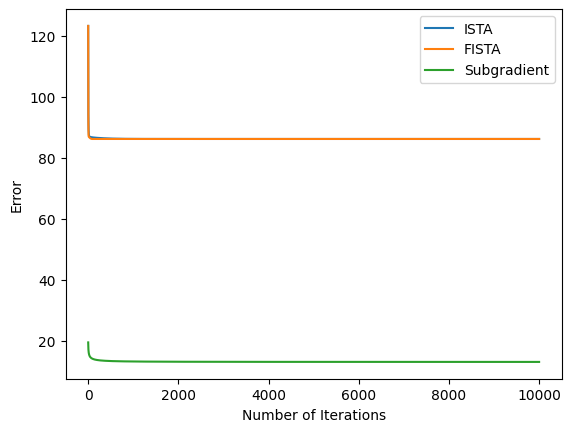

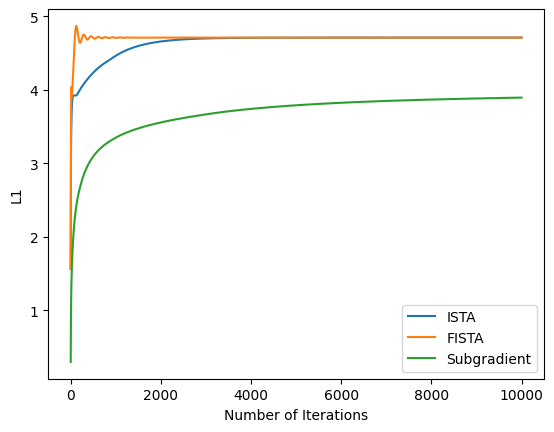

In [11]:
import numpy as np
import numpy.random as rn
import numpy.linalg as la
import matplotlib.pyplot as plt
import time

A = np.load("A.npy")
b = np.load("b.npy")


#from previous homework solution
def subgradient(x, A, b, t, lam, c=1e-4):
    grad_l1=np.sign(x)
    grad_l1[np.where(x==0)]=np.random.rand()*2-1
    grad=np.dot(A.T,np.dot(A,x)-b)+lam*grad_l1
    eta=c/np.sqrt(t+1)
    #eta = c/(t+1)
    y=x-eta*grad
    # to return the best solution
    if (0.5*np.square(la.norm(np.dot(A,y)-b,2))+lam*np.sum(abs(y))) < (0.5*np.square(la.norm(np.dot(A,x)-b,2))+lam*np.sum(abs(x))):
      x=y
    return x

#from previous homework solution as well
def descent(update, A, b, reg, T=int(1e3)):
    x = np.zeros(A.shape[1])
    error = []
    l1 = []
    loss = []
    elapsed_time = []
    start=time.time()
    for t in range(T):
        x = update(x, A, b, t, reg)
        end=time.time()
        if (t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            l1.append(np.sum(abs(x)))
            loss.append(0.5*la.norm(np.dot(A, x) - b)+reg*np.sum(abs(x)))
            elapsed_time.append(end-start)
            assert not np.isnan(error[-1])
    return x, error, l1, elapsed_time, loss

#ISTA
def ista(A, b, lam, step_size, T=int(1e4)):
    x = np.zeros(A.shape[1])
    errors = []
    l1 = []
    for _ in range(T):
        # Gradient step
        grad = A.T.dot(A.dot(x) - b)
        x = x - step_size * grad
        # Proximal step (soft thresholding)
        x = np.sign(x) * np.maximum(np.abs(x) - lam * step_size, 0)
        # Calculate and record the objective function value
        errors.append(0.5 * np.sum((A.dot(x) - b) ** 2) + lam * np.sum(np.abs(x)))
        l1.append(np.sum(abs(x)))
    return x, errors, l1


# FISTA
def fista(A, b, l1_reg, step_size, T=int(1e4)):
    x = np.zeros(A.shape[1])
    y = x.copy()
    t = 1
    errors = []
    l1 = []
    for _ in range(T):
        # Gradient step
        grad = A.T.dot(A.dot(y) - b)
        x_new = np.sign(y - step_size * grad) * np.maximum(np.abs(y - step_size * grad) - l1_reg * step_size, 0)
        # Update t and calculate the next y
        t_new = (1 + np.sqrt(1 + 4 * t ** 2)) / 2
        y = x_new + ((t - 1) / t_new) * (x_new - x)
        t = t_new
        x = x_new
        # Calculate and record the objective function value
        errors.append(0.5 * np.sum((A.dot(x) - b) ** 2) + l1_reg * np.sum(np.abs(x)))
        l1.append(np.sum(abs(x)))
    return x, errors, l1

L = np.linalg.norm(A.T.dot(A), 2)
step_size = 1.0 / L
#need to get beta - max eigenvalue
x_ista, errors_ista, l1_ista = ista(A, b, 0.1, step_size, T=int(1e4))
x_fista, errors_fista, l1_fista = fista(A, b, 0.1, step_size, T=int(1e4))
x_sg, error_sg, l1_sg, t_sg, loss_sg = descent(subgradient, A, b, step_size, T=int(1e4))
#plot
figure, ax = plt.subplots()

ax.plot(errors_ista, label='ISTA')
ax.plot(errors_fista, label='FISTA')
ax.plot(error_sg, label='Subgradient')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Error')
ax.legend()
plt.show()

figure, ax = plt.subplots()
ax.plot(l1_ista, label='ISTA')
ax.plot(l1_fista, label='FISTA')
ax.plot(l1_sg, label='Subgradient')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('L1')
ax.legend()
plt.show()


# Problem 3: Optional -- Why we use LASSO

As an optional exercise, you may want to play around with Lasso and explore its properties in the context of machine learning problems.

To do this: (A) Generate data for yourself at random: create a $n \times d$ matrix $A$ where each entry comes from a standard Gaussian. Choose $d$ much larger than $n$, say, $d = 1000$ and $n = 100$. Now choose the true solution, $x^{\ast}$ to be a $k$-sparse vector. You can do this in many ways. One simple approach is to let $x^{\ast}$ equal 10 on $k=5$ randomly chosen entries, and then zero every where else. Finally, generate $y$ according to
$$
y = Ax + \epsilon,
$$
where $\epsilon$ is zero mean Gaussian noise with variance $0.1$.

Now solve (via an algorithm of your choice) Lasso. Note that you will have to search for a good value for $\lambda$. Compare the solution you get $\hat{x}_{\rm lasso}$ with the true solution, as you vary $\lambda$. You may also want to compare it to the solution when you do not have any regularization.


# Problem 4: Logistic Regression

Logistic regression is a simple statistical classification method which models
the conditional distribution of the class variable $y$ being equal to class $c$
given an input $x \in \mathbb{R}^n$. We will examine two classification tasks, one
classifying newsgroup posts, and the other classifying digits. In these tasks
the input $x$ is some description of the sample (e.g., word counts in the news
case) and $y$ is the category the sample belongs to (e.g., sports, politics).
The Logistic Regression model assumes the class distribution conditioned on $x$
is log-linear:
$$
p(y=c|x,b_{1:C}) = \frac{e^{-b_c^\top x}}{\sum_{j=1}^C e^{-b_j^\top x}},
$$
where $C$ is the total number of classes, and the denominator sums over all
classes to ensure that $p(y|x)$ is a proper probability distribution. Each
class $c \in {1,2, \dots, C}$ has a parameter $b_c$, and $\mathbf{b} \in
\mathbb{R}^{nC}$ is the vector of concatenated parameters $\mathbf{b} =
[b_1^\top,b_2^\top,\dots,b_C^\top]^\top$.  Let $X \in \mathbb{R}^{N \times n}$ be the
data matrix where each sample $x_i^\top$ is a row and $N$ is the number of
samples.  The maximum likelihood approach seeks to find the parameter
$\mathbf{b}$ which maximizes the likelihood of the classes given the input data
and the model:

$$
\max_{b_{1:C}} \; p(y|x,b_{1:C}) = \prod_{i=1}^N p(y_i|x_i,b_{1:C}) = \prod_{i=1}^N \frac{e^{-b_{y_i}^\top x_i}}{\sum_{j=1}^C e^{-b_j^\top x_i}}.
$$

For the purposes of optimization, we can equivalently minimize the negative log
likelihood:
$$
\min_\mathbf{\beta} \ell(\mathbf{\beta}) = -\log p(\textbf{y}|X, \mathbf{\beta}) = \sum_{i=1}^N \left( \beta_{y_i}^\top x_i + \log{\sum_{j=1}^C e^{-\beta_j^\top x_i}} \right).
$$

After optimization, the model can be used to classify a new input by choosing
the class that the model predicts as having the highest likelihood; note that
we don't have to compute the normalizing quantity $\sum_{j=1}^C e^{-b_j^\top x}$
as it is constant across all classes:
$$
y = \arg\max_j p(y=j| x, \mathbf{\beta}) = \arg\min_j \beta_j^\top x
$$
In this problem, you will optimize the logistic regression model for the two
classification tasks mentioned above which vary in dimension and number of
classes. The newsgroup dataset that we consider here has $C=20$.

We will compare the performance of gradient descent and Nesterov's accelerated gradient
method on the $\ell^2$-regularized version of the logistic regression model:
$$
\min_{\boldsymbol{\beta}} = \frac{1}{N} \sum_{i=1}^N \left( \beta_{y_i}^\top x_i + \log{\sum_{j=1}^C e^{-\beta_j^\top x_i}} \right) + \mu \|\boldsymbol{\beta}\|^2.
$$

In this homework, we will use the training and testing data contained in the four csv files in logistic\_news.zip. In a later homework, we will look into the digits dataset (MNIST).



In [12]:
#sample code to load in logistic_news.zip
#we also create a Z matrix, useful for multiclass logistic regression optimization
import zipfile as zipfile
import numpy as np
import csv

class Data:
    def __init__(self,X,Y):
        self.X=X
        self.Y=Y

def loaddata(filename):
    import io
    data=[]
    with zipfile.ZipFile(filename) as z:
        for filename in z.namelist():
            if filename[0]=='X'or filename[0]=='y':
                each=[]
                with z.open(filename) as csvDataFile:
                    csvReader=csv.reader(csvDataFile)
                    csvDataFile_utf8 = io.TextIOWrapper(csvDataFile, 'utf-8')
                    csvReader=csv.reader(csvDataFile_utf8)
                    for row in csvReader:
                        each.append(row)
                    each==[[float(string) for string in row] for row in each]
                    each=np.asarray(each)
                    data.append(each)
    X_te=data[0].astype(float)
    X_tr=data[1].astype(float)
    y_te=data[2][0].astype(int)
    y_tr=data[3][0].astype(int)
    Z_tr,Z_te=[],[]
    for j in range(len(np.unique(y_tr))):
        Z_tr.append(np.sum(X_tr[np.where(y_tr==j)[0],:],axis=0))
        Z_te.append(np.sum(X_te[np.where(y_te==j)[0],:],axis=0))
    Z_tr=np.asarray(Z_tr).T
    Z_te=np.asarray(Z_te).T
    train= Data(X_tr,y_tr)
    train.Z=Z_tr
    test = Data(X_te,y_te)
    test.Z=Z_te
    return train,test

train,test=loaddata('./logistic_news.zip')

## Part (A) -- Optional --
Find the value of $\mu$ that gives you (approximately) the best generalization performance (error on test set). You obtain this by solving the the above optimization problem for different values of $\mu$, and then checking the performance of the solution on the testing set, using the unregularized logistic regression loss. Note that this is not a question about an optimization method.

What value do you get for the test loss after convergence?  

In [14]:
import numpy as np

# function for the logistic regregion - added a penalty for large coefficients
def logistic_regression_loss(X, y, b, mu):
    # Compute the logistic loss
    logits = X.dot(b)
    log_likelihood = -np.log(1 + np.exp(-y * logits)).sum()
    # Add the L2 regularization term
    l2_penalty = mu * np.sum(b**2)
    return -log_likelihood + l2_penalty

# gradient
def logistic_regression_gradient(X, y, b, mu):
    # Compute the gradient of the logistic loss
    logits = X.dot(b)
    predictions = 1 / (1 + np.exp(-logits))
    gradient = X.T.dot(predictions - y)
    # Add the gradient of the L2 regularization term
    gradient += 2 * mu * b
    return gradient

# descent implementation
def gradient_descent(X_train, y_train, X_test, y_test, b_init, mu, step_size, max_iter):
    losses_gd = np.zeros(max_iter)
    losses_test_gd = np.zeros(max_iter)
    norml2_gd = np.zeros(max_iter)
    b = b_init.copy()
    for t in range(max_iter):
        b -= step_size * logistic_regression_gradient(X_train, y_train, b, mu)
        losses_gd[t] = logistic_regression_loss(X_train, y_train, b, mu)
        losses_test_gd[t] = logistic_regression_loss(X_test, y_test, b, mu)
        norml2_gd[t] = np.linalg.norm(b)
    return b, losses_gd, losses_test_gd, norml2_gd

# accelerated descent implementation
def accelerated_gradient(X_train, y_train, X_test, y_test, b_init, mu, step_size, max_iter):
    b = b_init.copy()
    y = b_init.copy()
    t = 1
    losses_agd = np.zeros(max_iter)
    losses_test_agd = np.zeros(max_iter)
    norml2_agd = np.zeros(max_iter)
    for i in range(max_iter):
        b_old = b.copy()
        gradient = logistic_regression_gradient(X_train, y_train, y, mu)
        b = y - step_size * gradient
        t_old = t
        t = (1 + np.sqrt(1 + 4 * t**2)) / 2
        y = b + ((t_old - 1) / t) * (b - b_old)
        losses_agd[i] = logistic_regression_loss(X_train, y_train, y, mu)
        losses_test_agd[i] = logistic_regression_loss(X_test, y_test, y, mu)
        norml2_agd[i] = np.linalg.norm(y)
    return b, losses_agd, losses_test_agd, norml2_agd

# function to iterate through mu values to find out which is the best
def cross_validate(X_train, y_train, X_test, y_test, mu_values, max_iter=1000):
    best_mu = None
    best_error = float('inf')
    errors = []

    for mu in mu_values:
        # Initialize the parameter vector b
        b_init = np.zeros(X_train.shape[1])

        # only value of b will be used now
        b, _,_,_ = gradient_descent(X_train, y_train, X_test, y_test, b_init, mu, step_size, max_iter)

        # calculate the error
        test_loss = logistic_regression_loss(X_test, y_test, b, mu)
        errors.append(test_loss)

        # update best value for mu if error is better than the previous one
        if test_loss < best_error:
            best_error = test_loss
            best_mu = mu

    return best_mu, errors

# Define a range of mu_values to search over - from 10-4 to 10-1
mu_values = np.logspace(-4, -1, num=10, base=10)

# Define step_size and max_iter for gradient descent
step_size = 0.01
max_iter = 1000

# Perform cross-validation to find the best mu
best_mu, test_errors = cross_validate(train.X, train.Y, test.X, test.Y, mu_values, max_iter)

print("Best mu:", best_mu)
print("Test errors for each mu:", test_errors)

Best mu: 0.0001
Test errors for each mu: [140564768.45047364, 302140009.9928307, 647717419.790599, 1380639377.1379251, 2907020589.788327, 5962684940.8211975, 11571916540.275938, 20035191228.563007, 27761246810.55972, 26339987594.921032]


## Part (B)

If you did Part (A), use the value of $\mu$ you found there. If you did not, use $\mu = 0.001$.

Plot the loss against iterations for both the test and training data
using the value of $\mu$ from part (a).

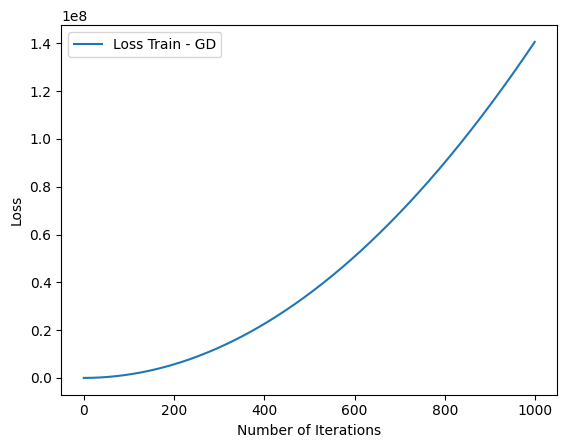

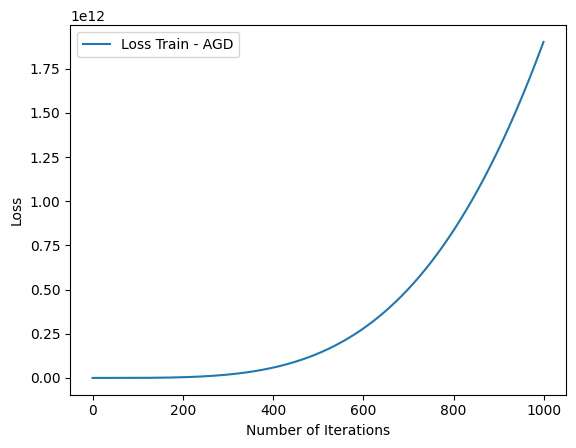

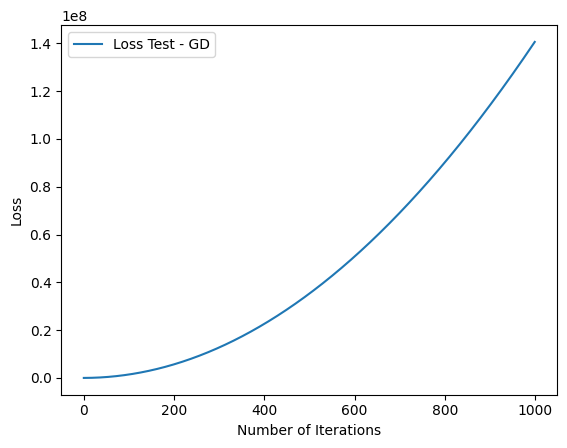

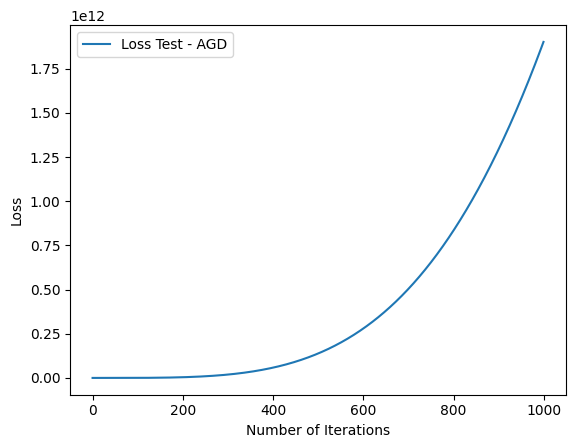

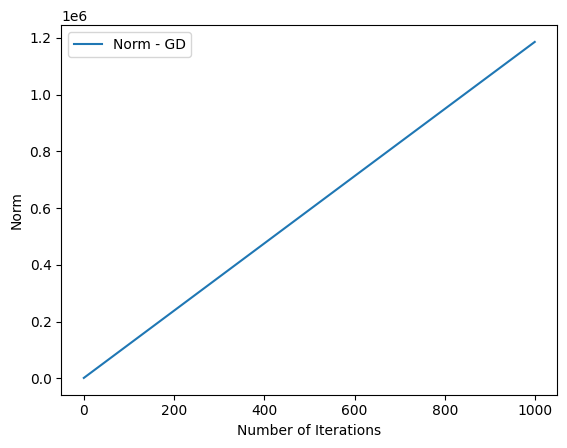

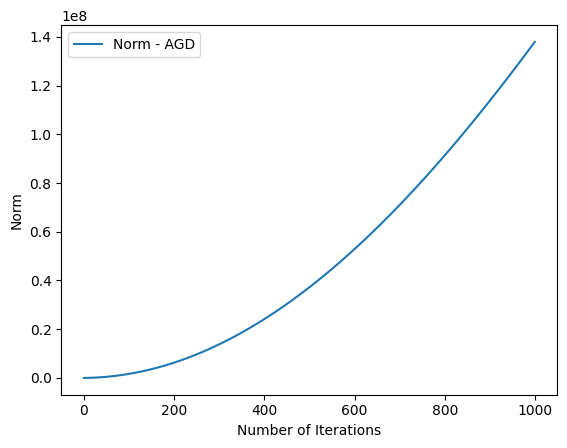

In [20]:
#best mu found in step A was Best mu: 0.0001
import matplotlib.pyplot as plt
mu_value = 0.0001

def validateGD(X_train, y_train, X_test, y_test, mu, T=1000):
    errors = []

    # initialization
    b_init = np.zeros(X_train.shape[1])
    b, losses_gd, losses_test_gd, norml2_gd = gradient_descent(X_train, y_train,  X_test, y_test, b_init, mu, step_size, max_iter)

    return losses_gd, losses_test_gd, norml2_gd


def validateAGD(X_train, y_train, X_test, y_test, mu, T=1000):
    errors = []

    # initialization
    b_init = np.zeros(X_train.shape[1])
    b, losses_agd, losses_test_agd, norml2_agd = accelerated_gradient(X_train, y_train,  X_test, y_test, b_init, mu, step_size, max_iter)

    return losses_agd, losses_test_agd, norml2_agd


losses_gd, losses_test_gd, norml2_gd = validateGD(train.X, train.Y, test.X, test.Y, mu_value, max_iter)
losses_agd, losses_test_agd, norml2_agd = validateAGD(train.X, train.Y, test.X, test.Y, mu_value, max_iter)

#print(losses_gd)
#print(losses_test_gd)

#plot
figure, ax = plt.subplots()

ax.plot(losses_gd, label='Loss Train - GD')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

figure, ax = plt.subplots()
ax.plot(losses_agd, label='Loss Train - AGD')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

figure, ax = plt.subplots()
ax.plot(losses_test_gd, label='Loss Test - GD')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

figure, ax = plt.subplots()
ax.plot(losses_test_agd, label='Loss Test - AGD')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Loss')
ax.legend()
plt.show()


figure, ax = plt.subplots()
ax.plot(norml2_gd, label='Norm - GD')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Norm')
ax.legend()
plt.show()

figure, ax = plt.subplots()
ax.plot(norml2_agd, label='Norm - AGD')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Norm')
ax.legend()
plt.show()


## Part (C)

How do the two algorithms differ in performance, and how does this change
as you decrease $\mu$?

In [ ]:
#AGD generally converges faster to a solution than GD. The parameter mu servers to control overfitting by penalizing large

In [ ]:
#coefficients in the model. So descreasing mu can lead to better performance as it will fit the training data more closely
#but at the expense of overfitting.